Configuração e Importação

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.storage import CloudStorage

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

Carregamento dos Dados (Astração S3/Local)

In [10]:
# Inicializa o storage (lê do .env para saber se é PROD ou LOCAL)
cs = CloudStorage()

df = cs.ler_csv('carros_dados_limpos.csv')

if df is not None:
    display(df.head())
else:
    print("Erro")

📂 Lendo do disco local: carros_dados_limpos.csv...


,Título,Descrição,Preço,Local,Ano,KM Rodado,Cidade,Estado,Transmissão
0,Chevrolet Onix,Onix 1.0 Joy SPE/4 manual,52900.0,"Belo Horizonte, MG",2019,72000,Belo Horizonte,MG,Manual
1,Honda CR-V,CR-V 2.0 16V 4X4 EXL (aut) automático,89000.0,"Vassouras, RJ",2012,80000,Vassouras,RJ,Automático
2,BMW Série 3,320i ActiveFlex automático,114900.0,"Sinop, MT",2015,10,Sinop,MT,Automático
3,Hyundai HB20,HB20 1.6 Comfort Plus (Aut) automático,70900.0,"Taubaté, SP",2018,56000,Taubaté,SP,Automático
4,Chevrolet Tracker,Tracker 1.2 Turbo Premier (Aut) automático,108900.0,"Belo Horizonte, MG",2020,40000,Belo Horizonte,MG,Automático


Análise Estatística Básica

In [ ]:
display(df.describe())

df.info()

,Preço,Ano,KM Rodado
count,9860.000000,9860.000000,9860.000000
mean,44088.546653,2015.150101,93715.237830
std,7952.304035,4.132920,45789.758975
min,15500.000000,1961.000000,0.000000
25%,38900.000000,2012.000000,61000.000000
50%,45990.000000,2015.000000,88846.500000
75%,50782.500000,2019.000000,122434.500000
max,114900.000000,2022.000000,500000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9860 entries, 0 to 9859
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Título       9860 non-null   object 
 1   Descrição    9860 non-null   object 
 2   Preço        9860 non-null   float64
 3   Local        9860 non-null   object 
 4   Ano          9860 non-null   int64  
 5   KM Rodado    9860 non-null   int64  
 6   Cidade       9860 non-null   object 
 7   Estado       9860 non-null   object 
 8   Transmissão  9860 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 693.4+ KB


Distribuição de Preços

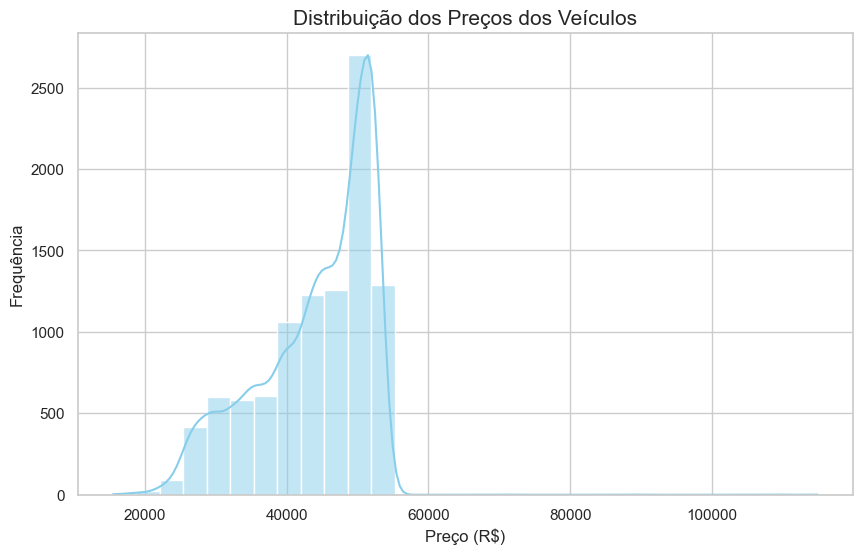

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Preço', kde=True, color='skyblue', bins=30)
plt.title('Distribuição dos Preços dos Veículos', fontsize=15)
plt.xlabel('Preço (R$)')
plt.ylabel('Frequência')
plt.show()

Preço x Ano de Fabricação

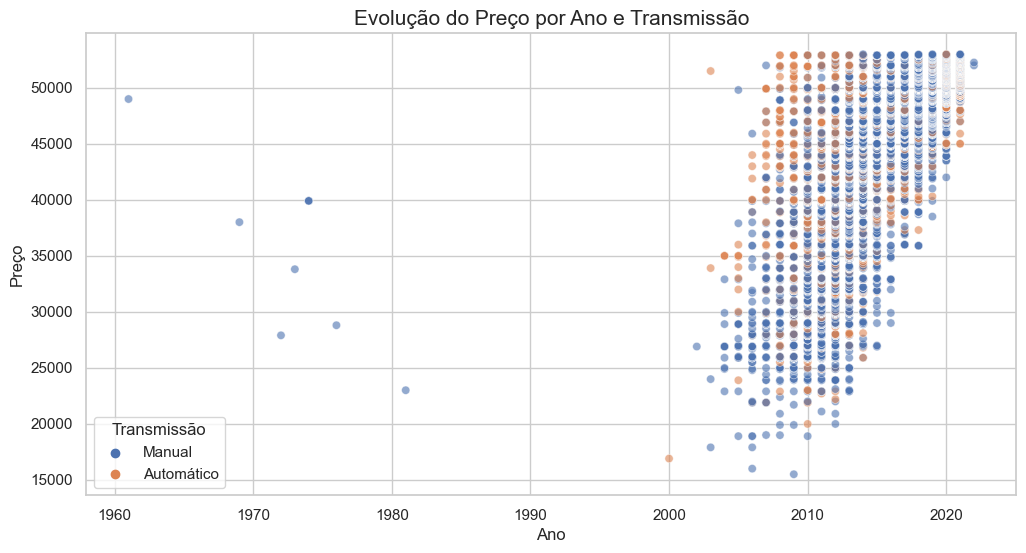

In [ ]:
plt.figure(figsize=(12, 6))
df_clean = df[df['Preço'] < df['Preço'].quantile(0.99)]

sns.scatterplot(data=df_clean, x='Ano', y='Preço', hue='Transmissão', alpha=0.6)
plt.title('Evolução do Preço por Ano e Transmissão', fontsize=15)
plt.show()

Correlações

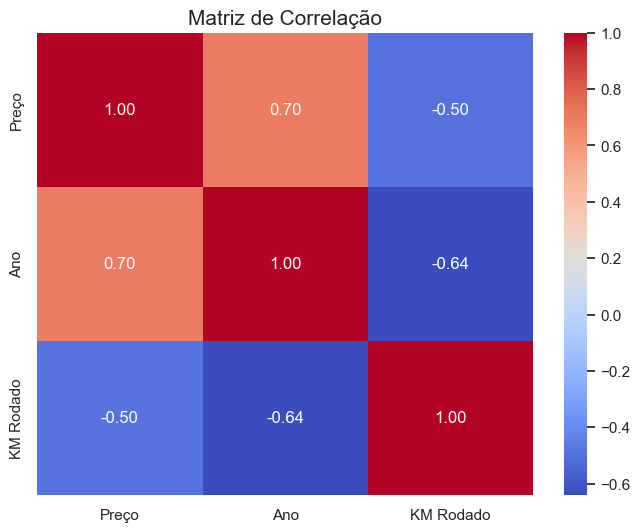

In [ ]:
plt.figure(figsize=(8, 6))
heatmap_data = df[['Preço', 'Ano', 'KM Rodado']].corr()

sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação', fontsize=15)
plt.show()